# Titanic Competition - Exploration

## 1. Goal description

**Goal**:

* Build model, to classify if titanic's passenger would survive / not survive
* Undestand relation between passenger features and survival status
* Compare different classification models and find one with best performance vs. complication ration

**Evaluation**:

* Supervised machine learning model will be used

* **Models**:
    * Naive Bayes classifier
    * K-nearest neighbors
    * Logistic regression
    * Linear discriminant analysis
    * Quadratic discriminant analysis
    * Decision tree
    * Random forest

* **Metrics**:
    * Precision
    * Recall
    * F1-metric
    * ROC-AUC 
    * Training time
    * Testing time
    * Accuracy

* **Technics**:
    * Forward selection
    * Cross validation
    * Grid search

## 2. Data collection

**Data**:

* Publicy available dataset from Kaggle competition
* Contains information about passengers and their survival status
* Already divided into train and test set (test set will be not considered in exploring and modeling)
* Number of train observations: $891$
* Number of train columns: $12$
* Dependent variable: `Survived`

**Features**:

* `PassengerId`
* `Survival`
* `Pclass` - ticket class
* `Name`
* `Sex`
* `Age` - in years	
* `SibSp` - number of siblings / spouses aboard the Titanic	
* `Parch`	- number of parents / children aboard the Titanic	
* `Ticket` - ticket number	
* `Fare`
* `Cabin` - cabin number
* `Embarked` - port of embarkation

**Source**: https://www.kaggle.com/c/titanic/overview

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set_theme(style="whitegrid", palette="muted")

plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],  # or another preferred font
})

sns.set_context("notebook")

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

## 3. Data review

**Dataset structure is suitable for a classification task**:
* 7 numerical variables and 6 textual variables
* Target variable `Survived` has two classes: 0 - passenger survivded, and 1 - passeneger not survived
* `PassengerId` is a unique identifier for each passenger
* `PassengerId`, `Name`, `Ticket` and `Cabin` will be not further taken into consideration as values in these columns are all unqiue or missing

**Dataset has acceptable qualitu**:
* Only 177 missing values in whole data set
* No potential outliers identified
* Some classes are imbalanced

**Dataset shows strong potential for a classification task**:
* Strong relation between `Survived` and `Pclass`, `Sex`, `Fare`, `Embarked`
* Distribution of `Age` per `Survived` is quite similar - no relation
* Distribution of `SibSp` and `Parch` are too imbalanced to use them

### 3.1 General analysis

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.select_dtypes(["int64", "float64"]).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.select_dtypes(["object"]).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [9]:
train.select_dtypes(["int64", "float64"]).agg(["skew", "kurtosis"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
skew,0.0,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317
kurtosis,-1.2,-1.775005,-1.280015,0.178274,17.880420,9.778125,33.398141


In [10]:
for col in train.columns:
    print(f"Columns: {col}\n{train[col].value_counts()}\n")

Columns: PassengerId
PassengerId
1      1
2      1
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    1
891    1
Name: count, Length: 891, dtype: int64

Columns: Survived
Survived
0    549
1    342
Name: count, dtype: int64

Columns: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Columns: Name
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: 

In [11]:
for col in train.columns:
    print(f"Columns: {col}\nUnique values: {len(train[col].unique())}\n")

Columns: PassengerId
Unique values: 891

Columns: Survived
Unique values: 2

Columns: Pclass
Unique values: 3

Columns: Name
Unique values: 891

Columns: Sex
Unique values: 2

Columns: Age
Unique values: 89

Columns: SibSp
Unique values: 7

Columns: Parch
Unique values: 7

Columns: Ticket
Unique values: 681

Columns: Fare
Unique values: 248

Columns: Cabin
Unique values: 148

Columns: Embarked
Unique values: 4



In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3.2 Visual analysis

#### 3.2.1 Survived analysis

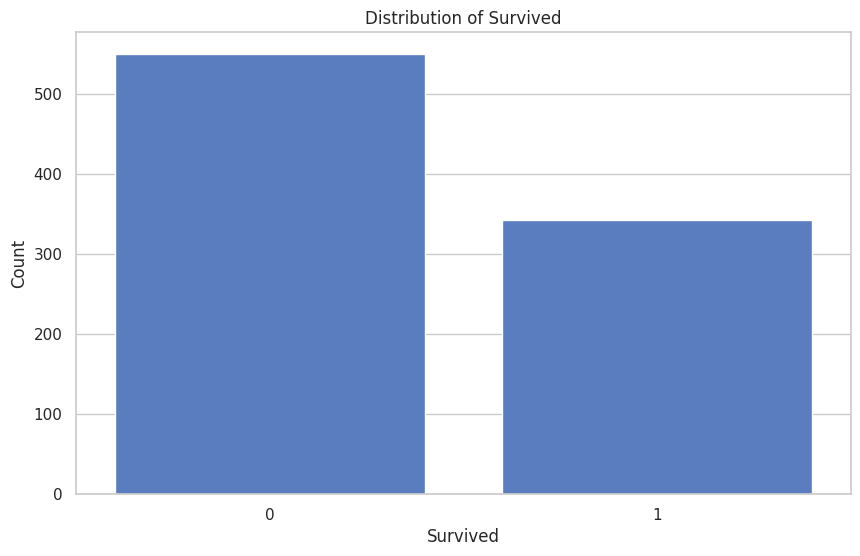

In [13]:
survived = train["Survived"].value_counts()

sns.barplot(
    x=survived.index,
    y=survived.values
)
plt.title("Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

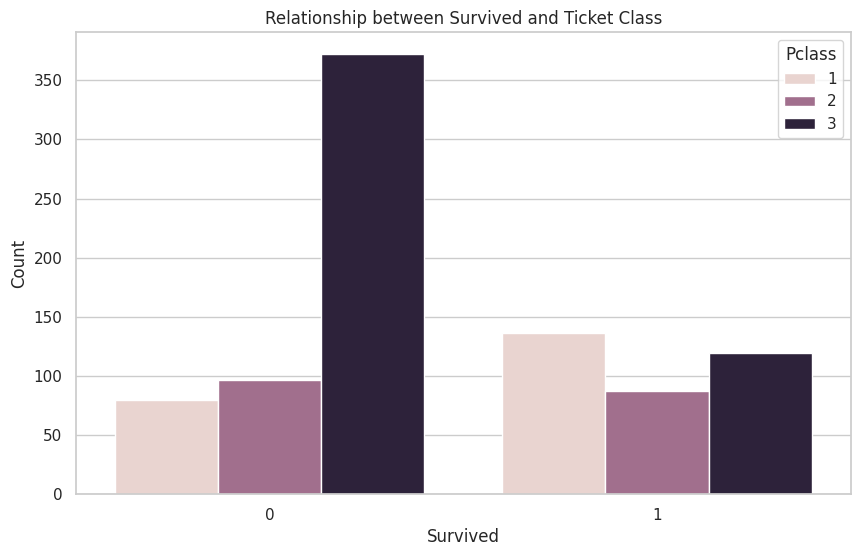

In [14]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Pclass"
)
plt.title("Relationship between Survived and Ticket Class")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

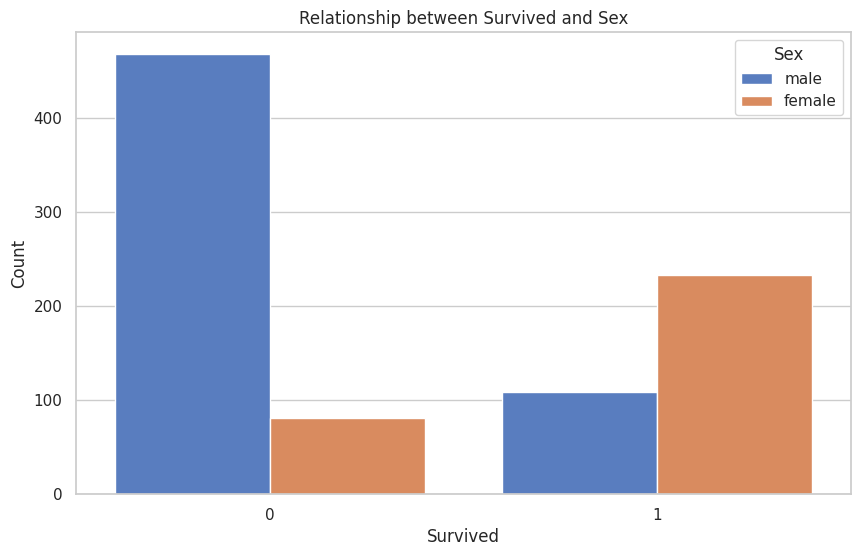

In [15]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Sex"
)
plt.title("Relationship between Survived and Sex")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

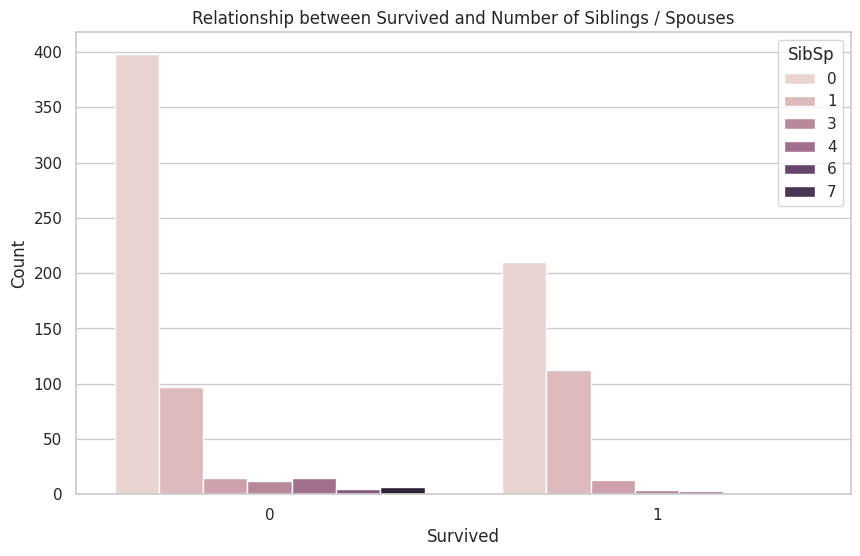

In [16]:
sns.countplot(
    data=train,
    x="Survived",
    hue="SibSp"
)
plt.title("Relationship between Survived and Number of Siblings / Spouses")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

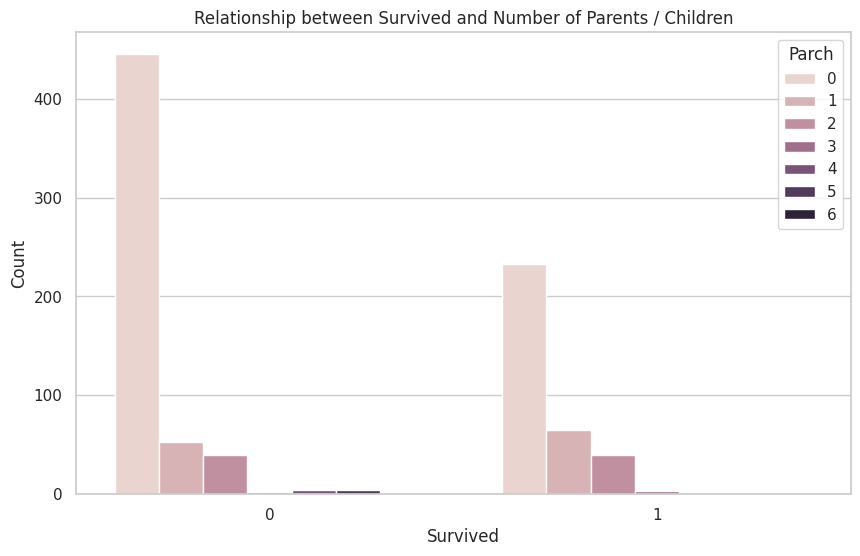

In [17]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Parch"
)
plt.title("Relationship between Survived and Number of Parents / Children")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

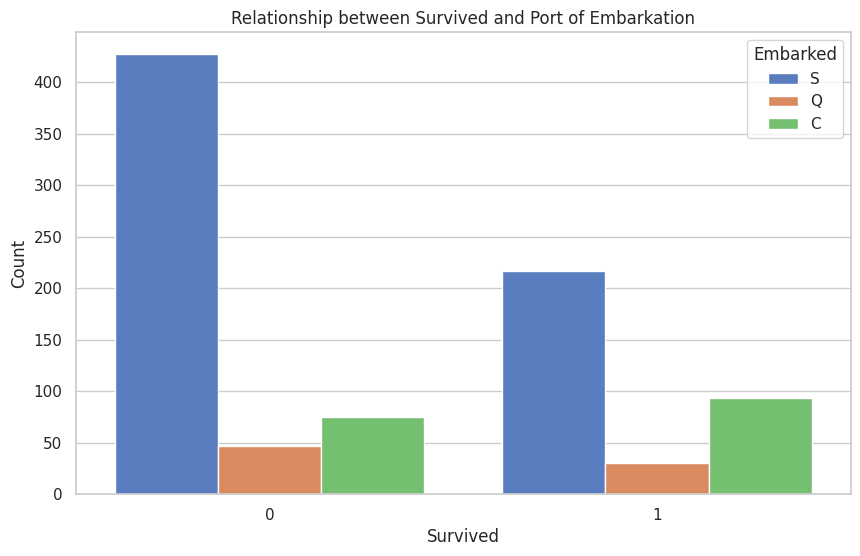

In [18]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Embarked"
)
plt.title("Relationship between Survived and Port of Embarkation")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

#### 3.2.2 Ticket class analysis

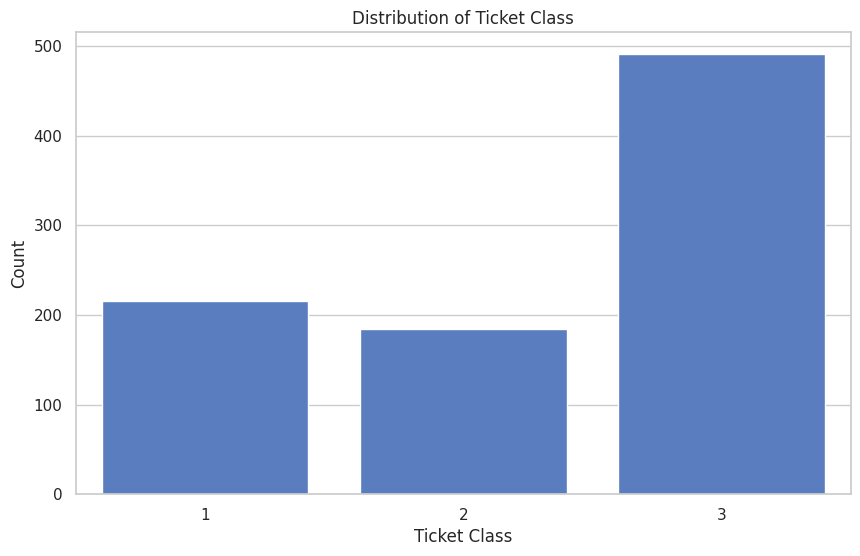

In [19]:
pclass = train["Pclass"].value_counts()

sns.barplot(
    x=pclass.index,
    y=pclass.values
)
plt.title("Distribution of Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

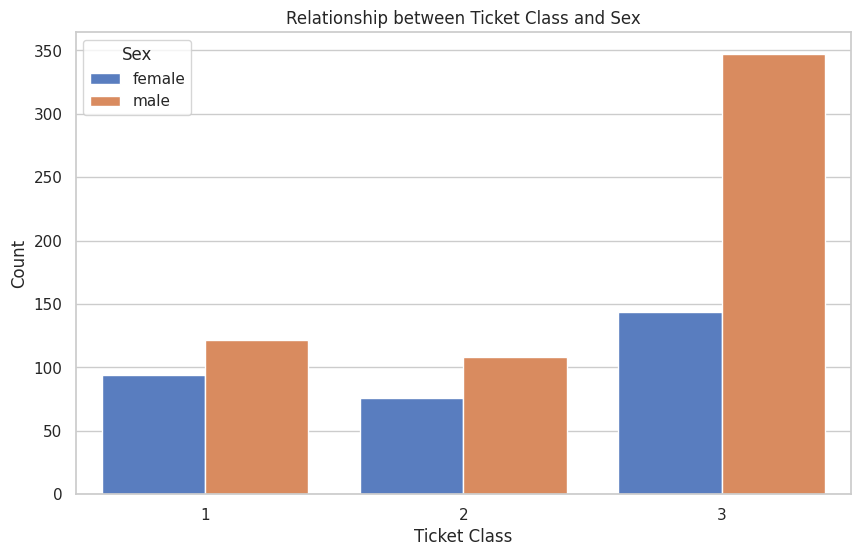

In [20]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Sex"
)
plt.title("Relationship between Ticket Class and Sex")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

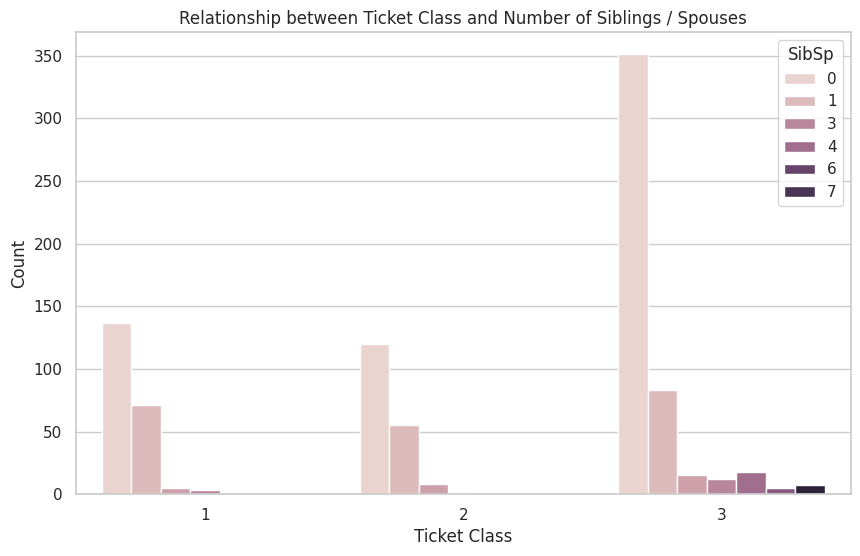

In [21]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="SibSp"
)
plt.title("Relationship between Ticket Class and Number of Siblings / Spouses")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

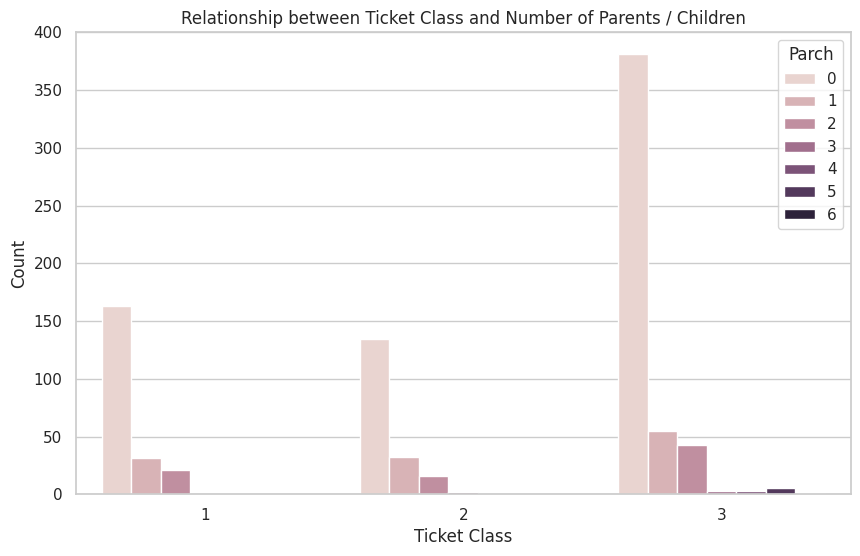

In [22]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Parch"
)
plt.title("Relationship between Ticket Class and Number of Parents / Children")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

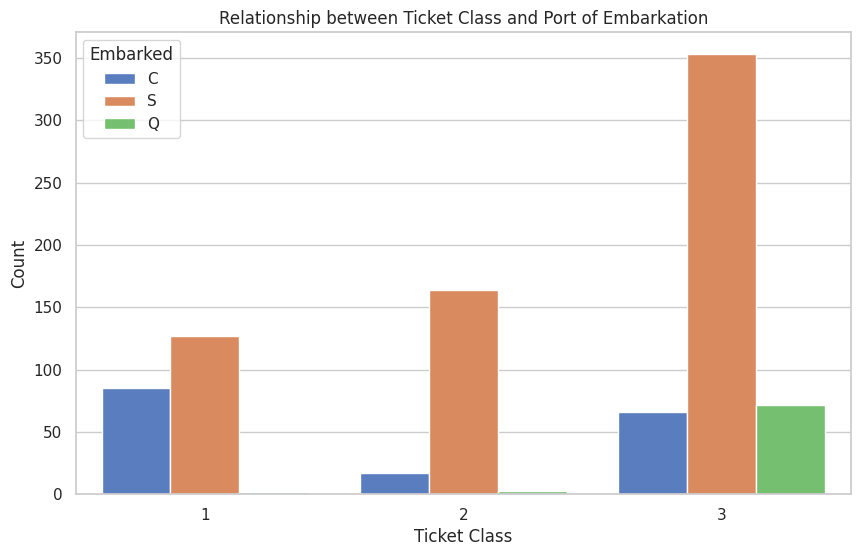

In [23]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Embarked"
)
plt.title("Relationship between Ticket Class and Port of Embarkation")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

#### 3.2.3 Sex analysis

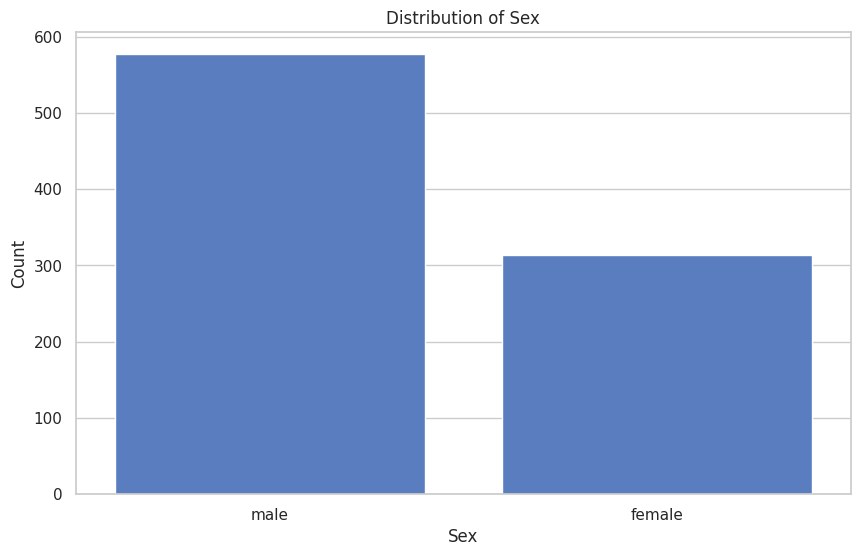

In [24]:
sex = train["Sex"].value_counts()

sns.barplot(
    x=sex.index,
    y=sex.values
)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

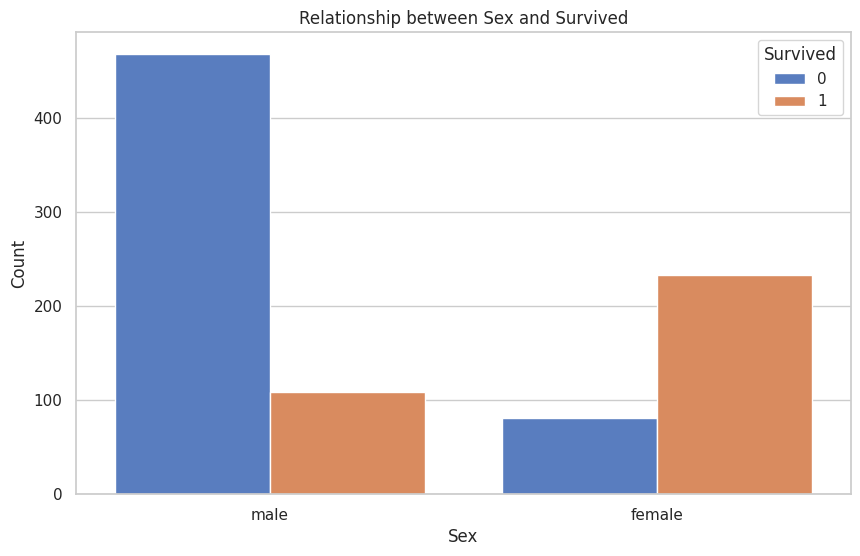

In [25]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Survived"
)
plt.title("Relationship between Sex and Survived")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

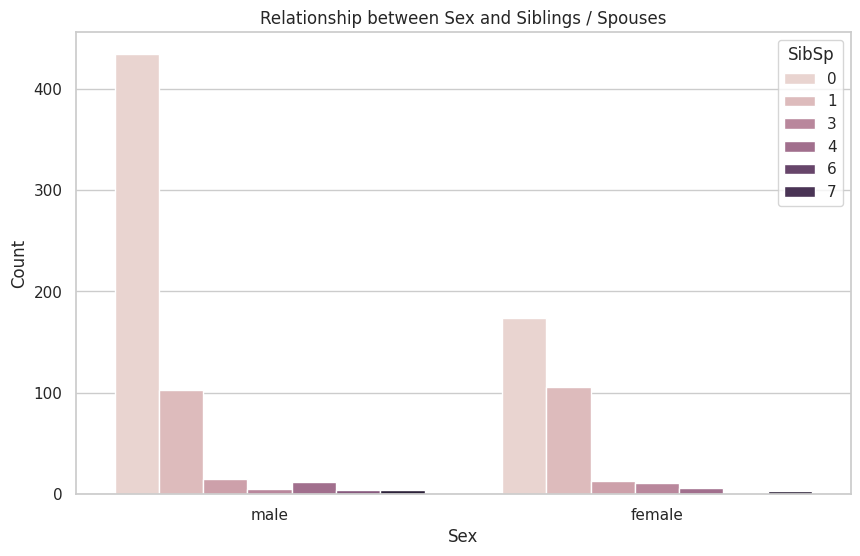

In [26]:
sns.countplot(
    data=train,
    x="Sex",
    hue="SibSp"
)
plt.title("Relationship between Sex and Siblings / Spouses")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

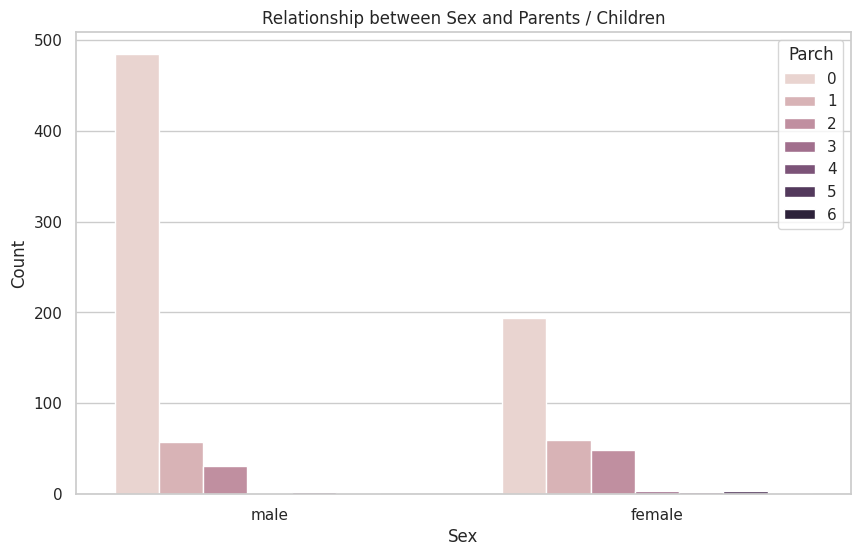

In [27]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Parch"
)
plt.title("Relationship between Sex and Parents / Children")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

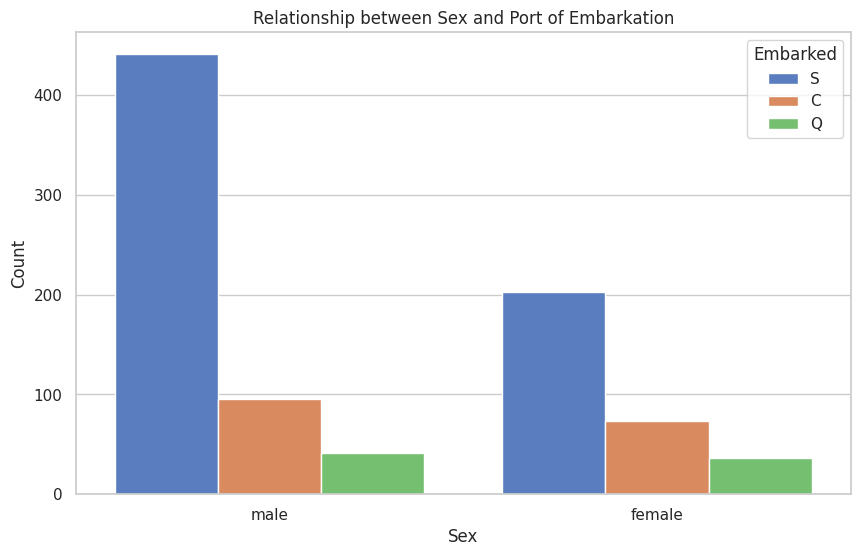

In [28]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Embarked"
)
plt.title("Relationship between Sex and Port of Embarkation")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

#### 3.2.4 Age analysis

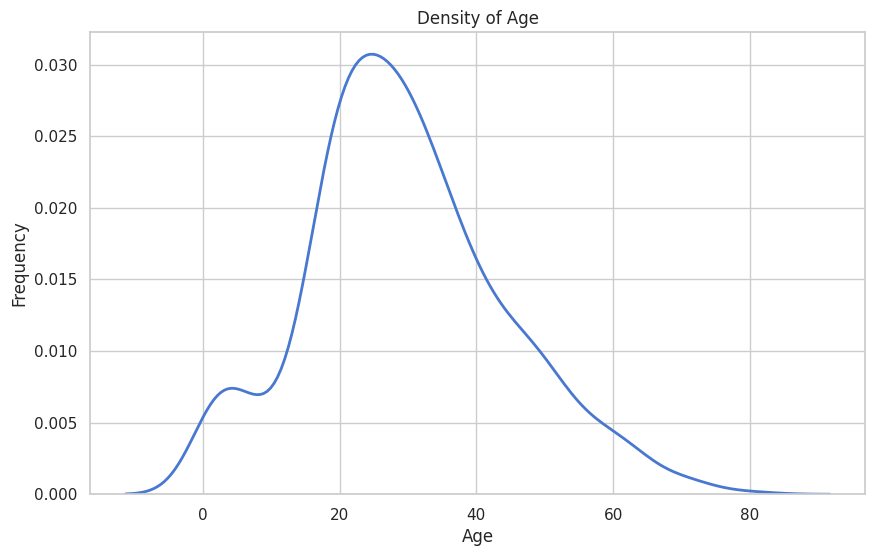

In [29]:
sns.kdeplot(
    data=train,
    x="Age",
    linewidth=2,
)

plt.title("Density of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

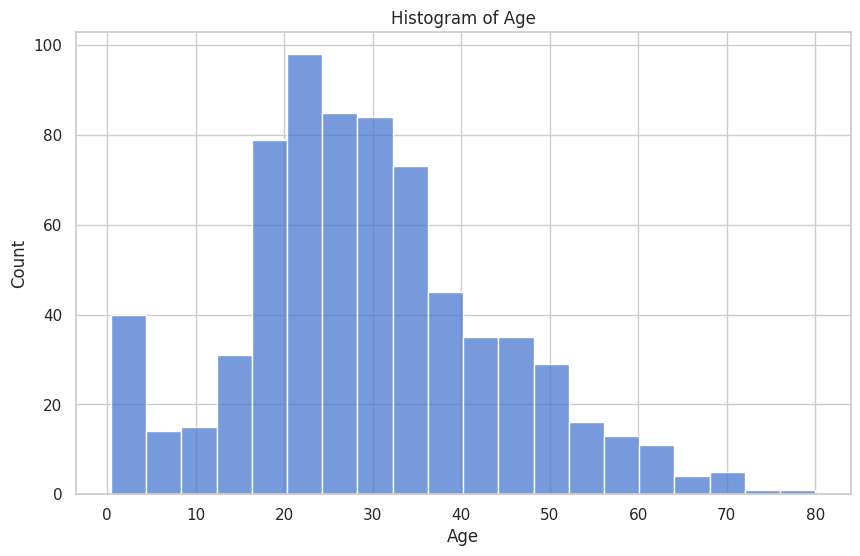

In [30]:
sns.histplot(
    data=train,
    x="Age",
    bins="auto",
)

plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

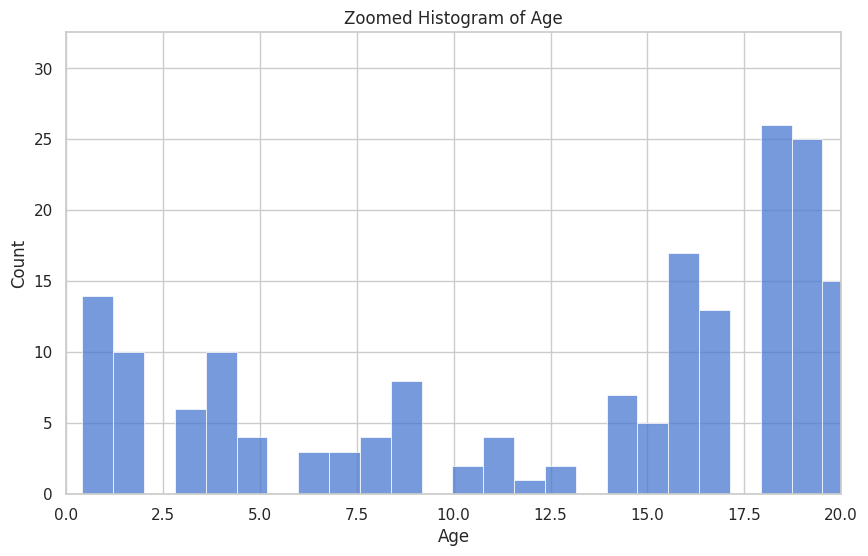

In [31]:
sns.histplot(
    data=train,
    x="Age",
    bins=100
)

plt.title("Zoomed Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim([0, 20])
plt.show()

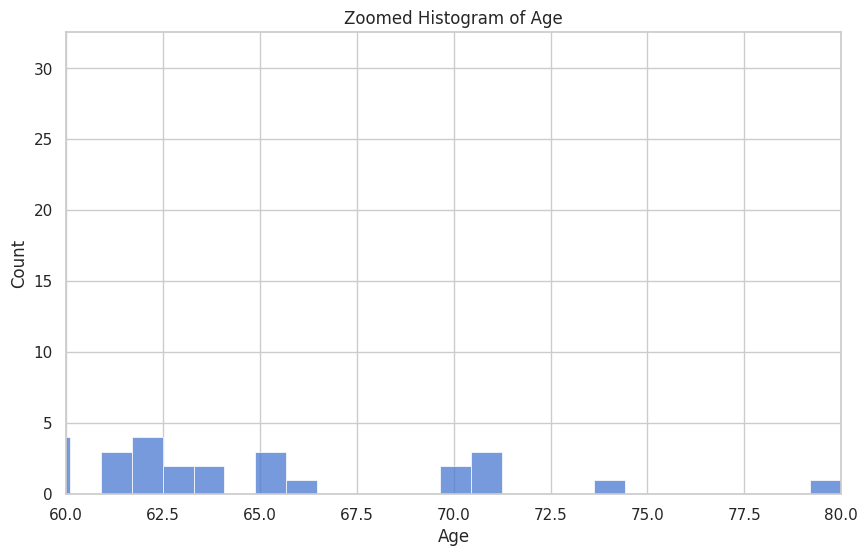

In [32]:
sns.histplot(
    data=train,
    x="Age",
    bins=100
)

plt.title("Zoomed Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim([60, 80])
plt.show()

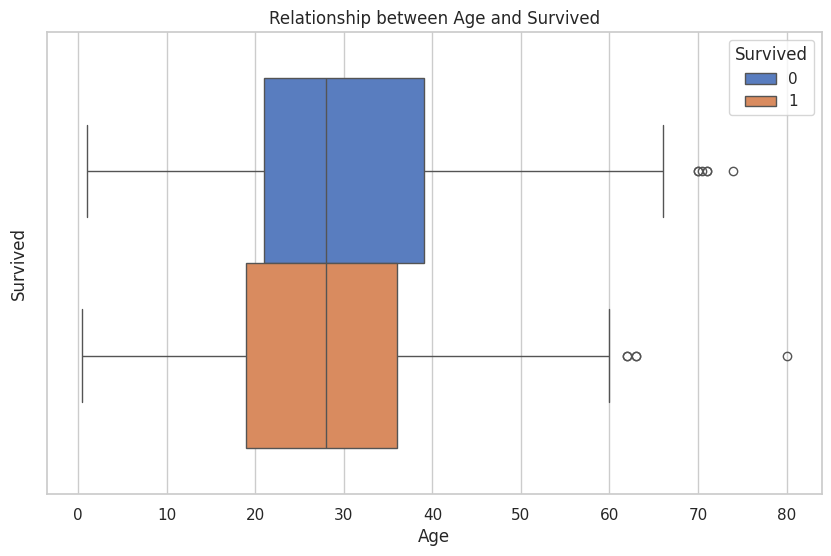

In [33]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Survived",
)

plt.title("Relationship between Age and Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

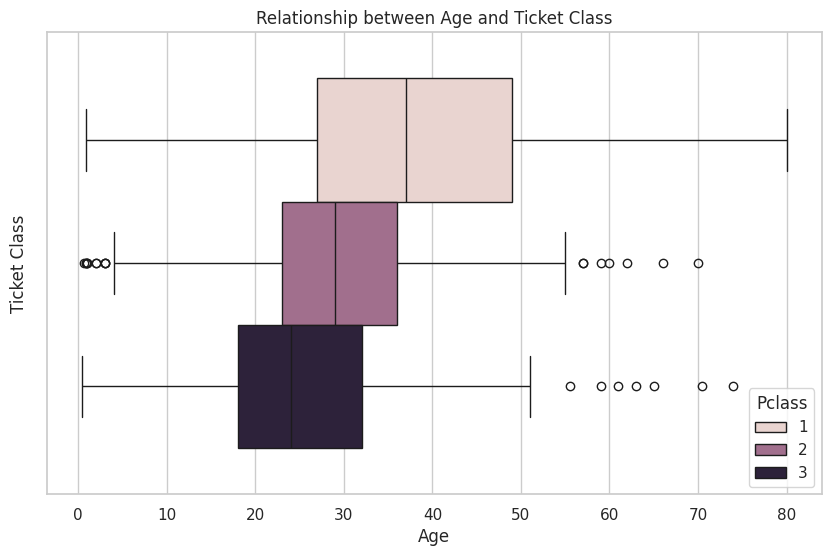

In [34]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Pclass",
)

plt.title("Relationship between Age and Ticket Class")
plt.xlabel("Age")
plt.ylabel("Ticket Class")
plt.show()

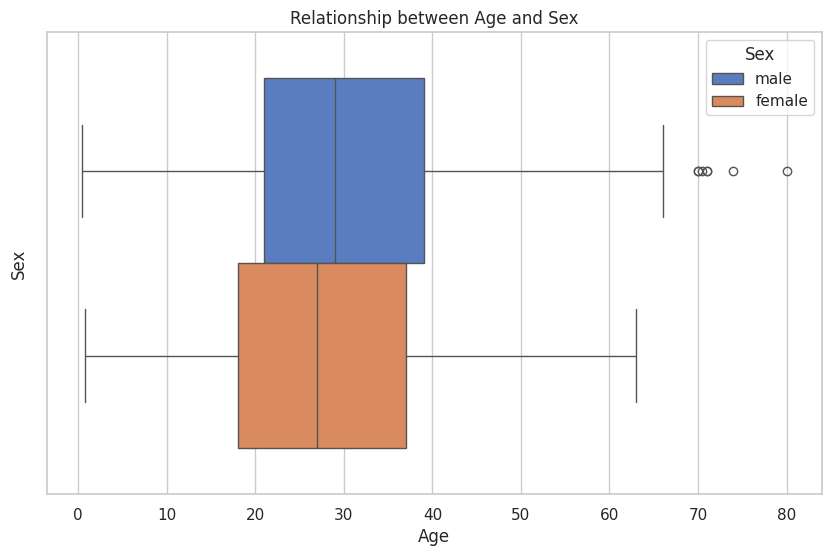

In [35]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Sex",
)

plt.title("Relationship between Age and Sex")
plt.xlabel("Age")
plt.ylabel("Sex")
plt.show()

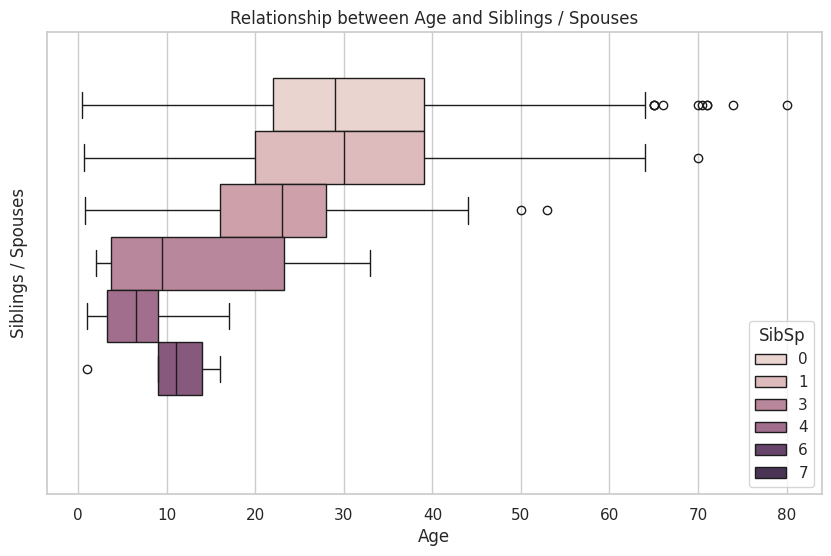

In [36]:
sns.boxplot(
    data=train,
    x="Age",
    hue="SibSp",
)

plt.title("Relationship between Age and Siblings / Spouses")
plt.xlabel("Age")
plt.ylabel("Siblings / Spouses")
plt.show()

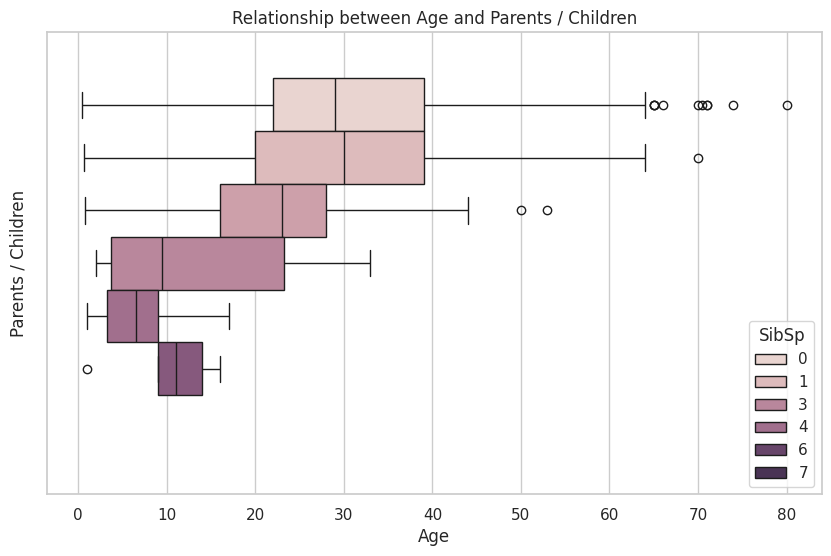

In [37]:
sns.boxplot(
    data=train,
    x="Age",
    hue="SibSp",
)

plt.title("Relationship between Age and Parents / Children")
plt.xlabel("Age")
plt.ylabel("Parents / Children")
plt.show()

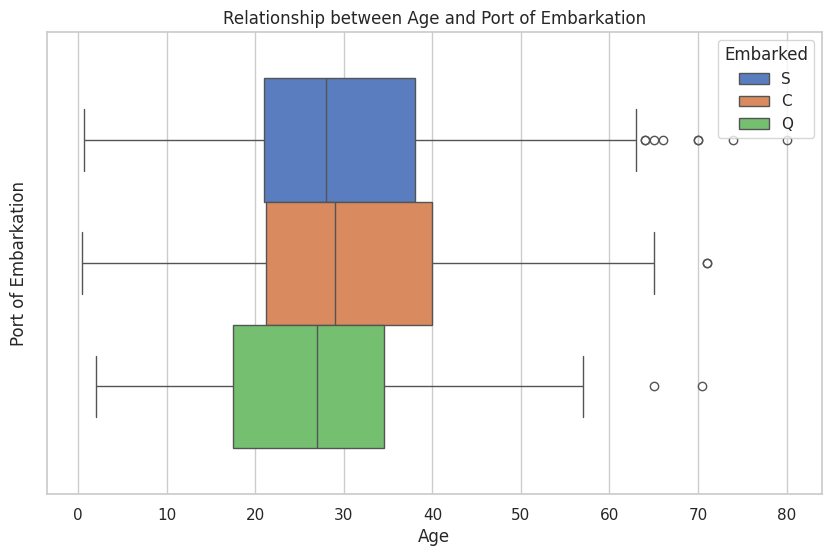

In [38]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Embarked",
)

plt.title("Relationship between Age and Port of Embarkation")
plt.xlabel("Age")
plt.ylabel("Port of Embarkation")
plt.show()

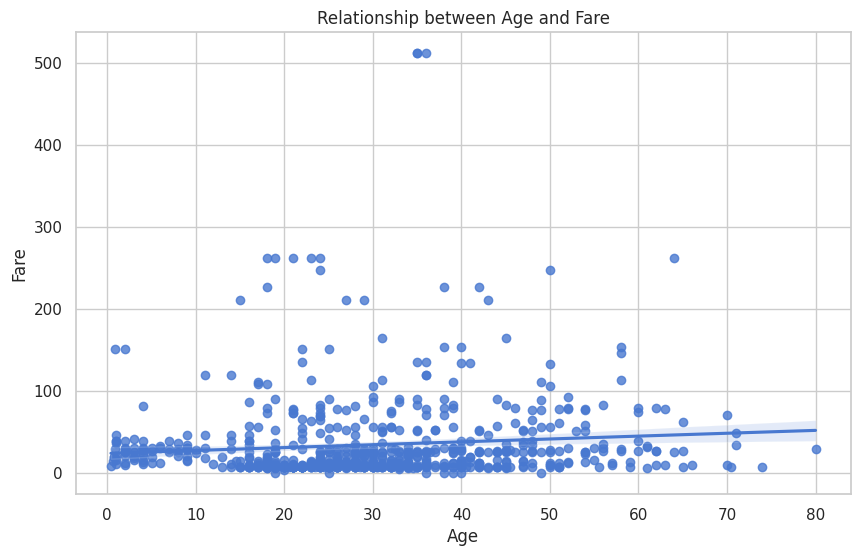

In [39]:
sns.regplot(
    data=train,
    x="Age",
    y="Fare"
)

plt.title("Relationship between Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

#### 3.2.5 Siblings / Spouses analysis

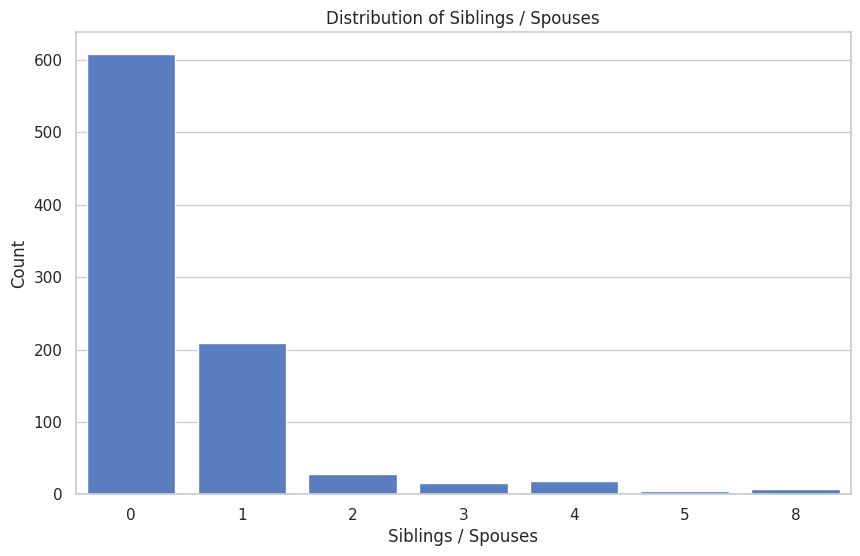

In [40]:
sibsp = train["SibSp"].value_counts()

sns.barplot(
    x=sibsp.index,
    y=sibsp.values
)
plt.title("Distribution of Siblings / Spouses")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

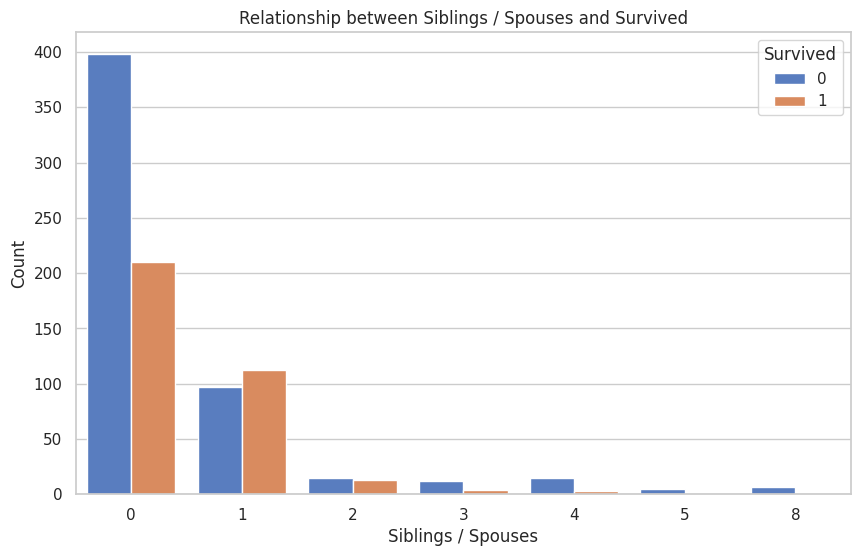

In [41]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Survived"
)
plt.title("Relationship between Siblings / Spouses and Survived")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

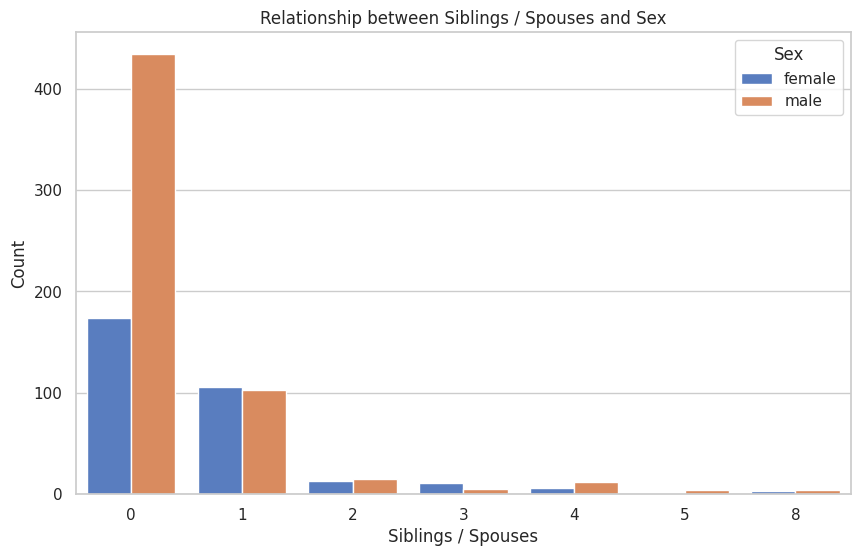

In [42]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Sex"
)
plt.title("Relationship between Siblings / Spouses and Sex")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

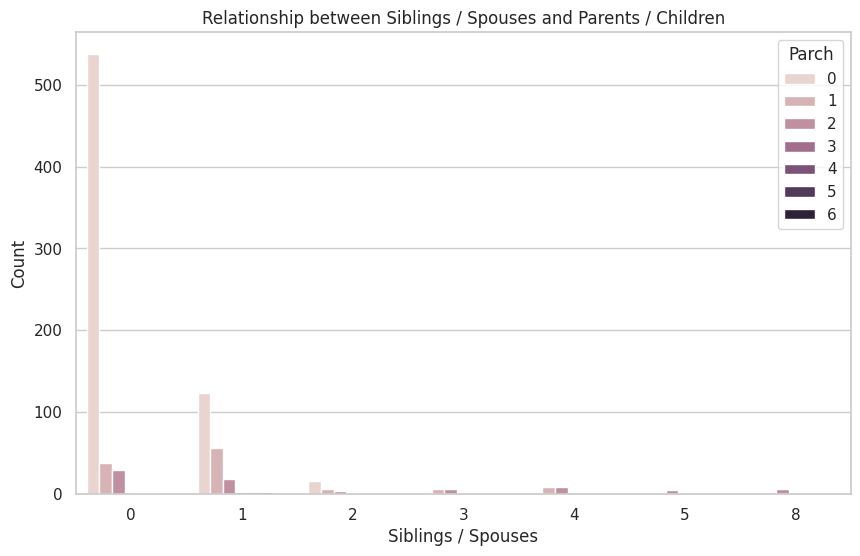

In [43]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Parch"
)
plt.title("Relationship between Siblings / Spouses and Parents / Children")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

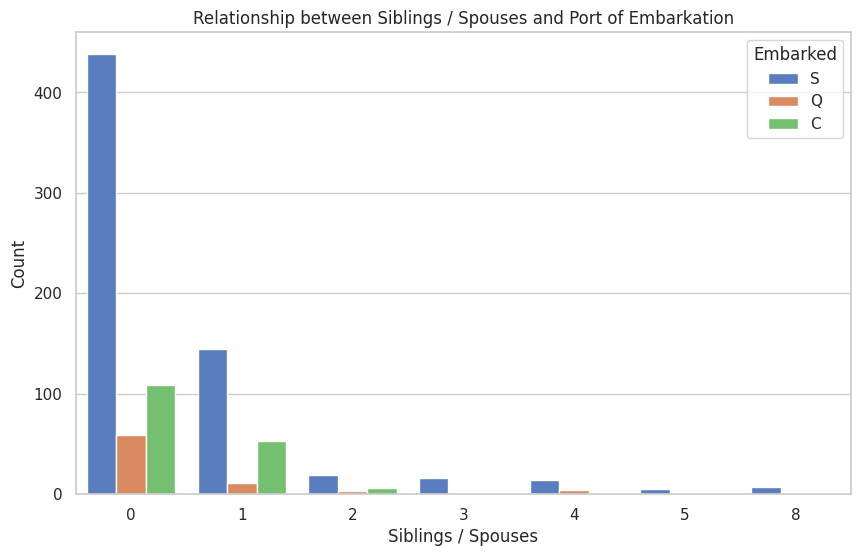

In [44]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Embarked"
)
plt.title("Relationship between Siblings / Spouses and Port of Embarkation")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

#### 3.2.6 Parents / Children analysis

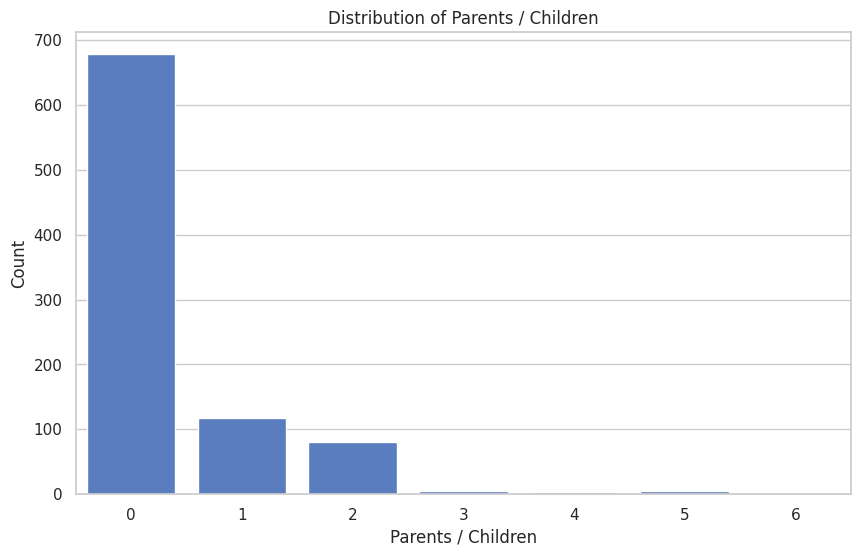

In [45]:
parch = train["Parch"].value_counts()

sns.barplot(
    x=parch.index,
    y=parch.values
)
plt.title("Distribution of Parents / Children")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

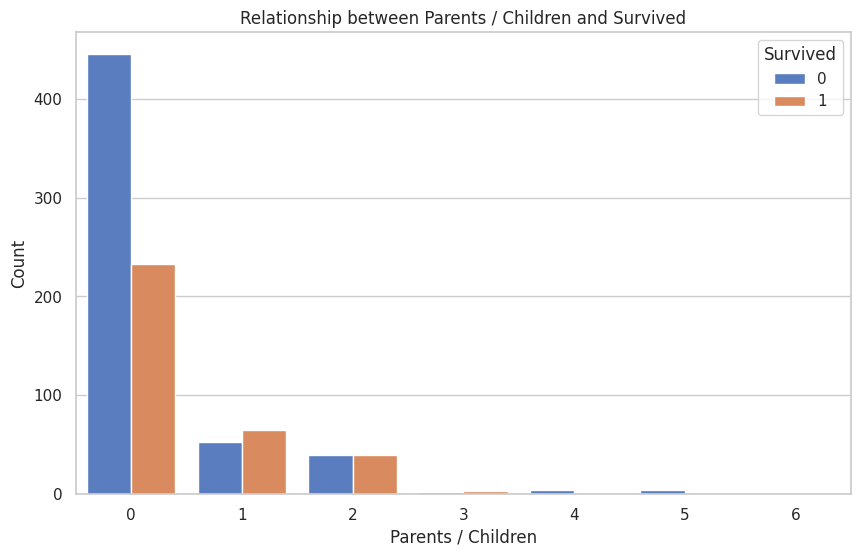

In [46]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Survived"
)
plt.title("Relationship between Parents / Children and Survived")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

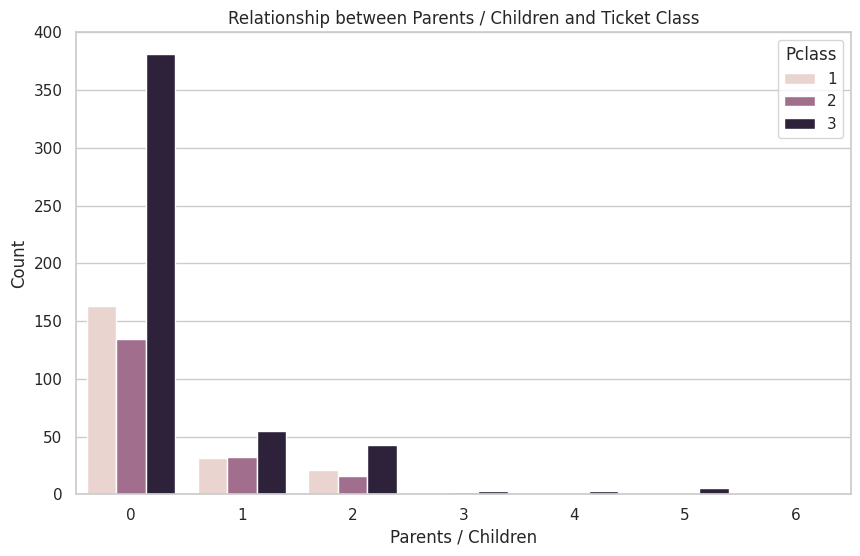

In [47]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Pclass"
)
plt.title("Relationship between Parents / Children and Ticket Class")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

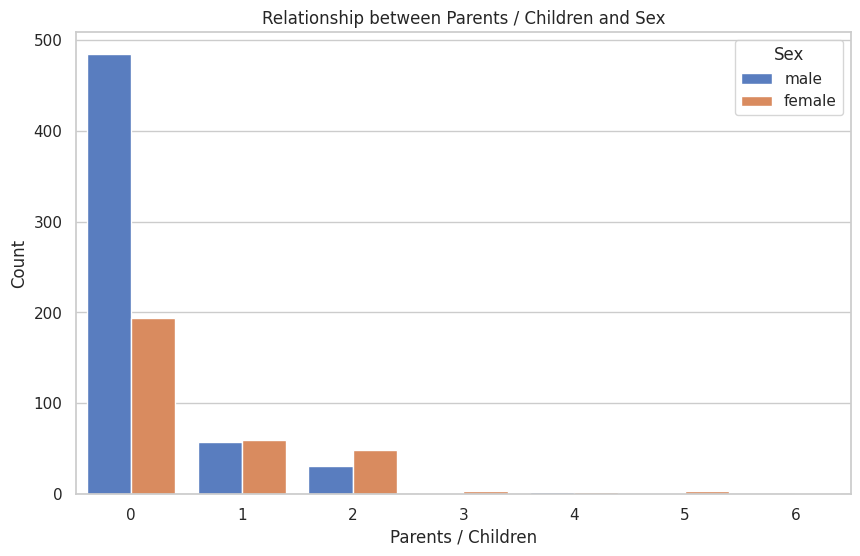

In [48]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Sex"
)
plt.title("Relationship between Parents / Children and Sex")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

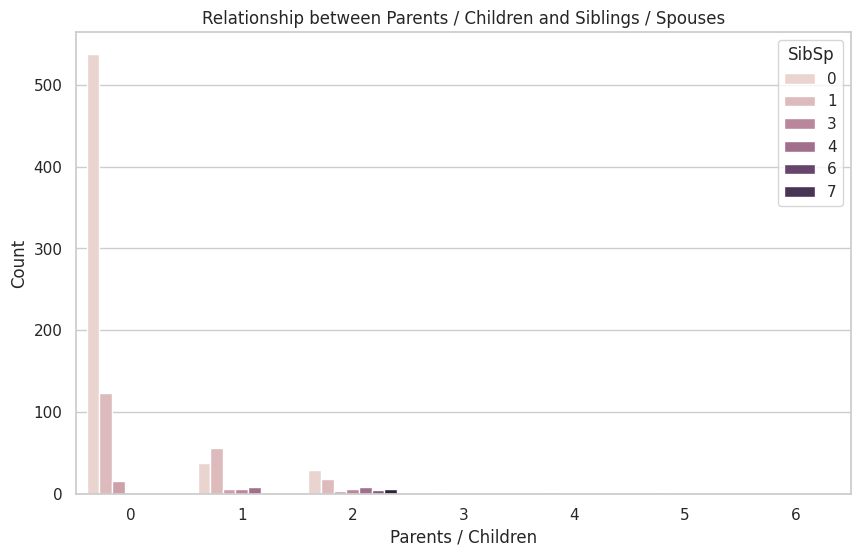

In [49]:
sns.countplot(
    data=train,
    x="Parch",
    hue="SibSp"
)
plt.title("Relationship between Parents / Children and Siblings / Spouses")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

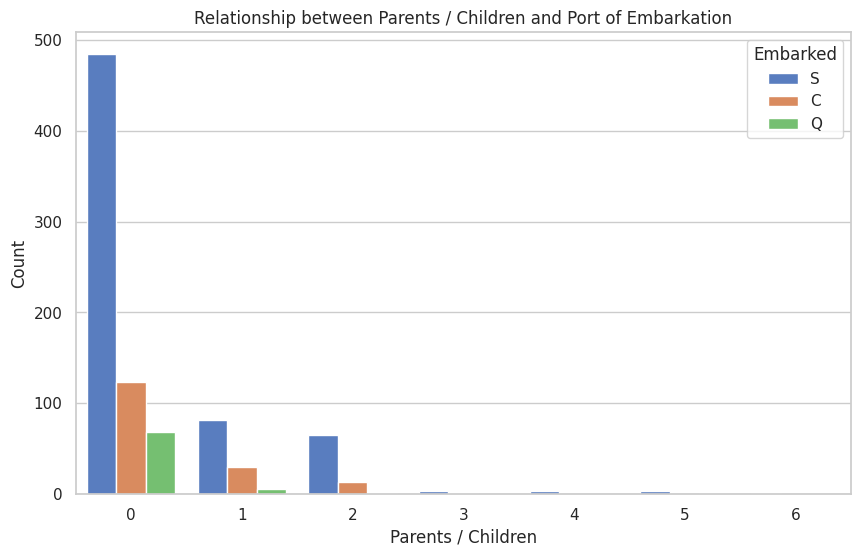

In [50]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Embarked"
)
plt.title("Relationship between Parents / Children and Port of Embarkation")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

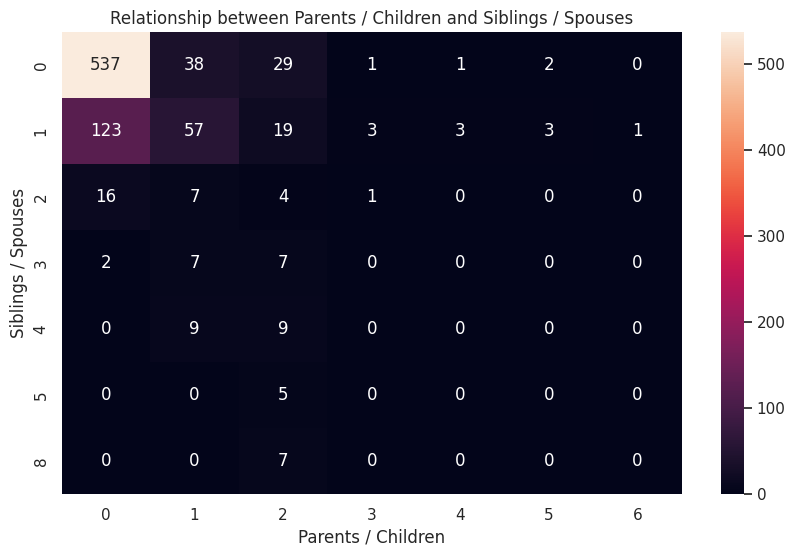

In [51]:
cross_table = pd.crosstab(train["SibSp"], train["Parch"])

sns.heatmap(cross_table, annot=True, fmt="d")

plt.title("Relationship between Parents / Children and Siblings / Spouses")
plt.xlabel("Parents / Children")
plt.ylabel("Siblings / Spouses")
plt.show()

#### 3.2.7 Fare analysis

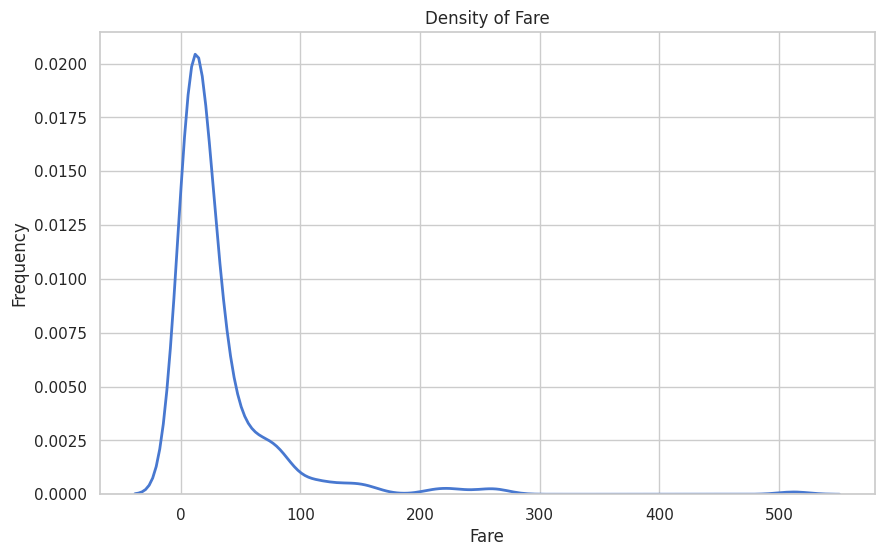

In [52]:
sns.kdeplot(
    data=train,
    x="Fare",
    linewidth=2,
)

plt.title("Density of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

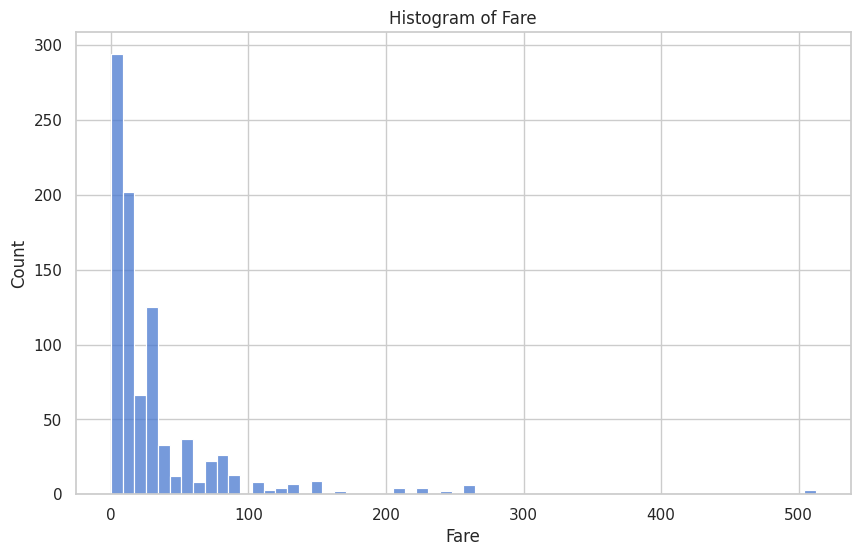

In [53]:
sns.histplot(
    data=train,
    x="Fare",
    bins="auto",
)

plt.title("Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

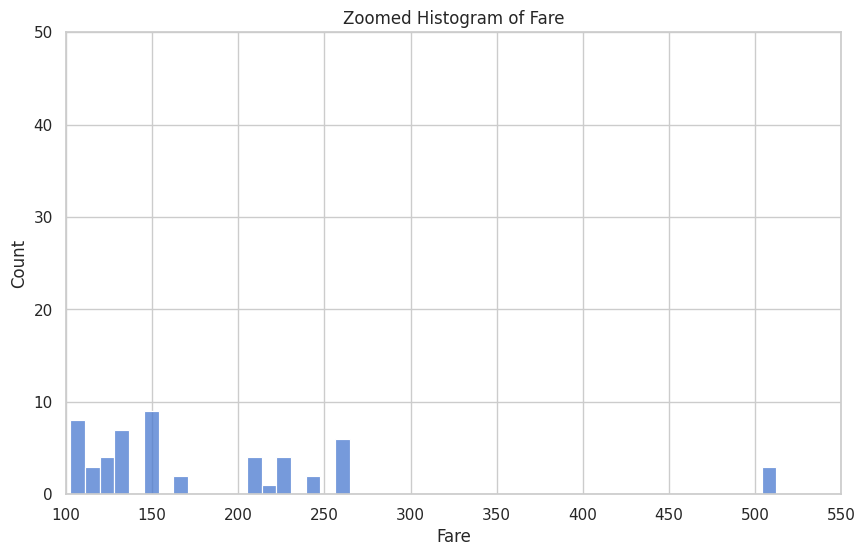

In [54]:
sns.histplot(
    data=train,
    x="Fare",
    bins="auto",
)

plt.title("Zoomed Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.xlim([100, 550])
plt.ylim([0, 50])
plt.show()

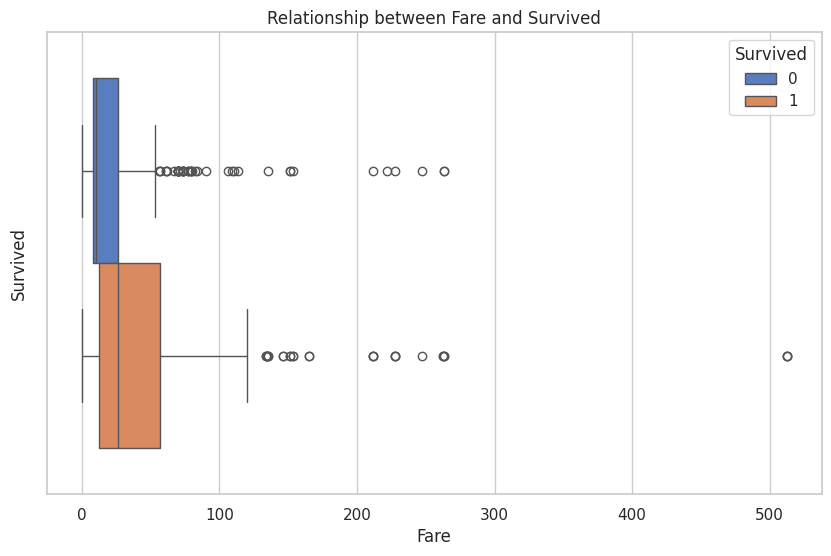

In [55]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Survived",
)

plt.title("Relationship between Fare and Survived")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

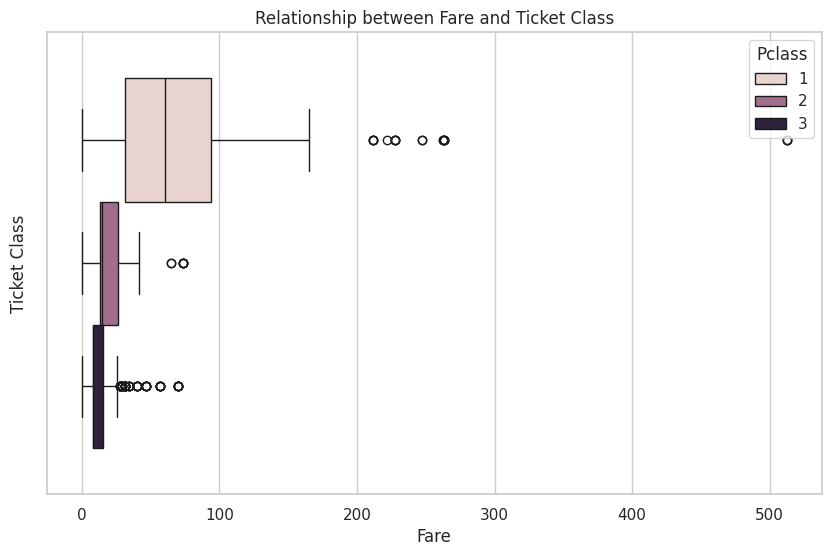

In [56]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Pclass",
)

plt.title("Relationship between Fare and Ticket Class")
plt.xlabel("Fare")
plt.ylabel("Ticket Class")
plt.show()

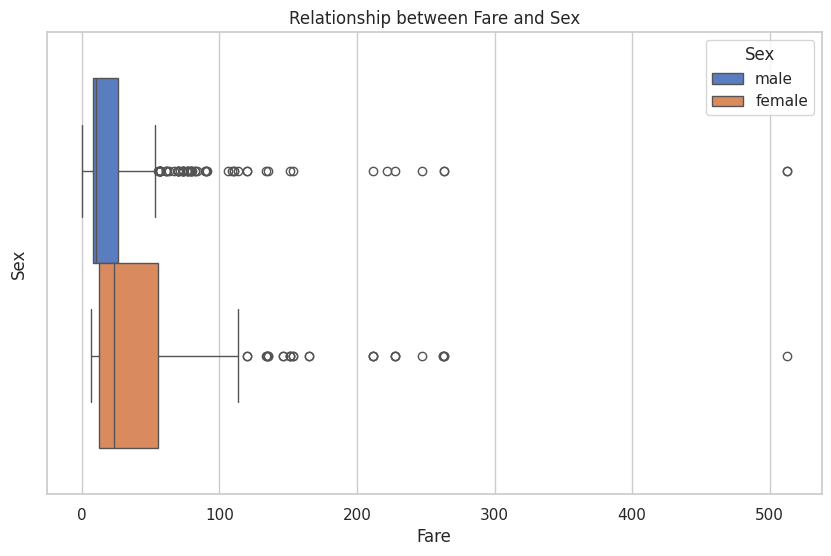

In [57]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Sex",
)

plt.title("Relationship between Fare and Sex")
plt.xlabel("Fare")
plt.ylabel("Sex")
plt.show()

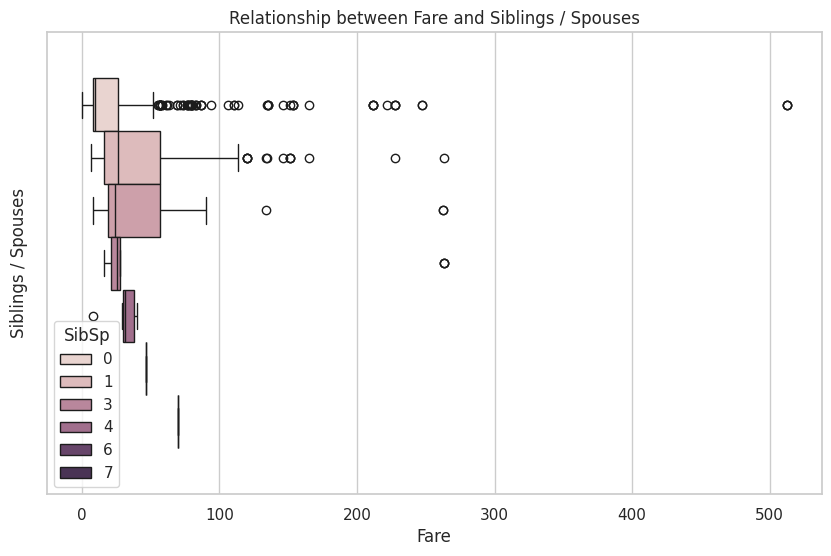

In [58]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="SibSp",
)

plt.title("Relationship between Fare and Siblings / Spouses")
plt.xlabel("Fare")
plt.ylabel("Siblings / Spouses")
plt.show()

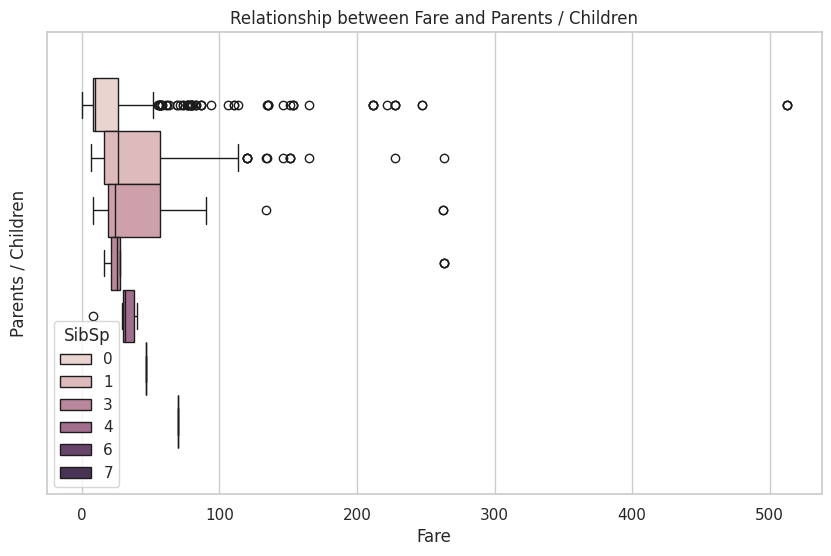

In [59]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="SibSp",
)

plt.title("Relationship between Fare and Parents / Children")
plt.xlabel("Fare")
plt.ylabel("Parents / Children")
plt.show()

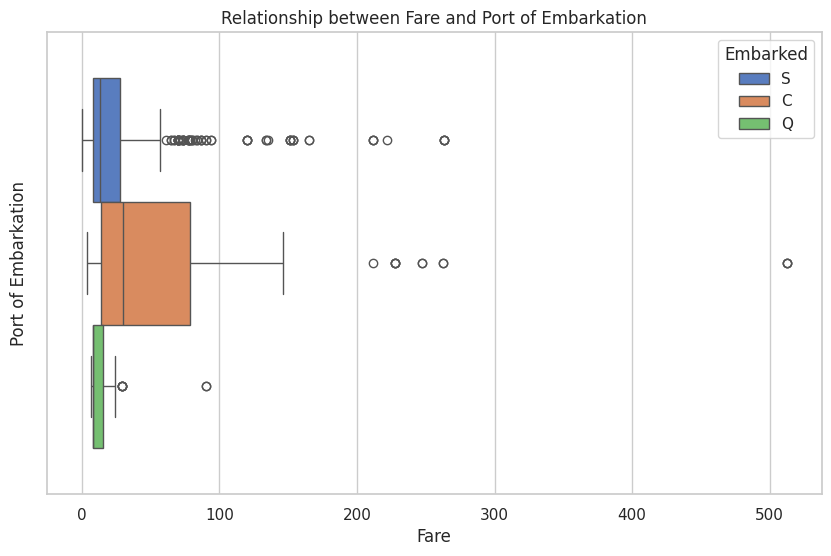

In [60]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Embarked",
)

plt.title("Relationship between Fare and Port of Embarkation")
plt.xlabel("Fare")
plt.ylabel("Port of Embarkation")
plt.show()

#### 3.2.8 Port of embarkation analysis

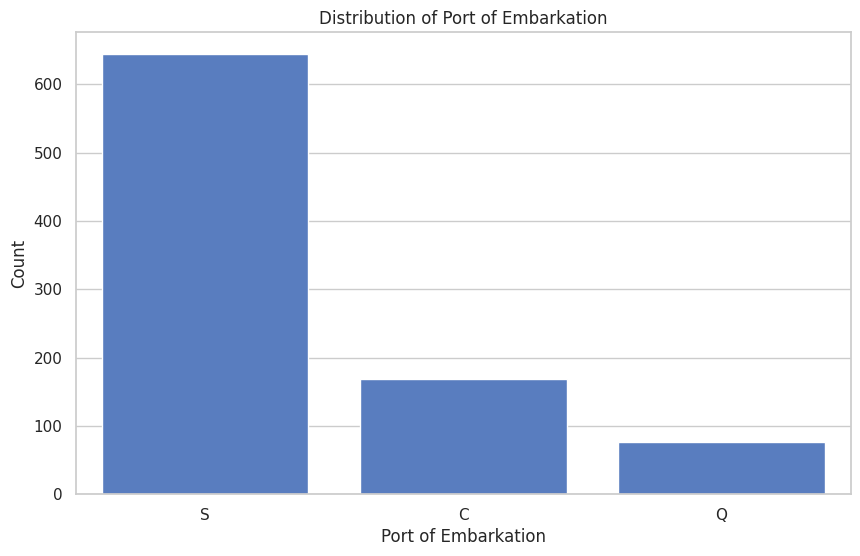

In [61]:
embarked = train["Embarked"].value_counts()

sns.barplot(
    x=embarked.index,
    y=embarked.values
)
plt.title("Distribution of Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

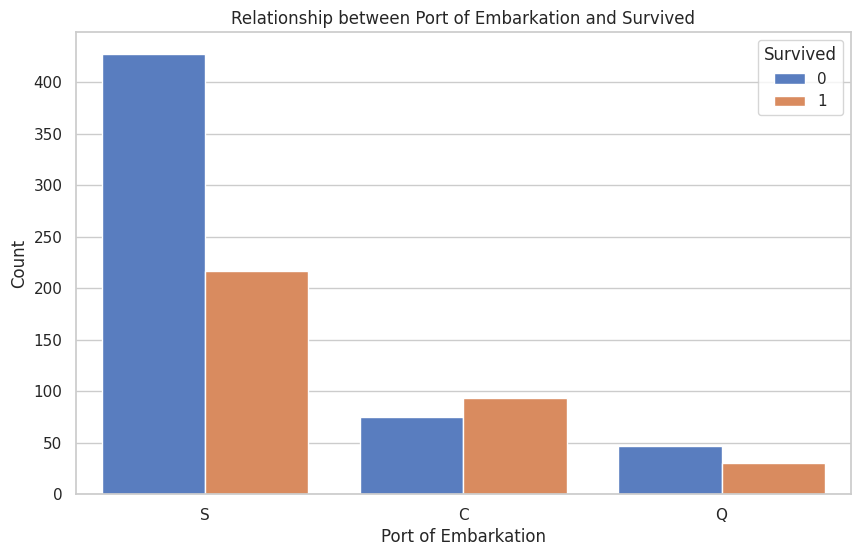

In [62]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Survived"
)
plt.title("Relationship between Port of Embarkation and Survived")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

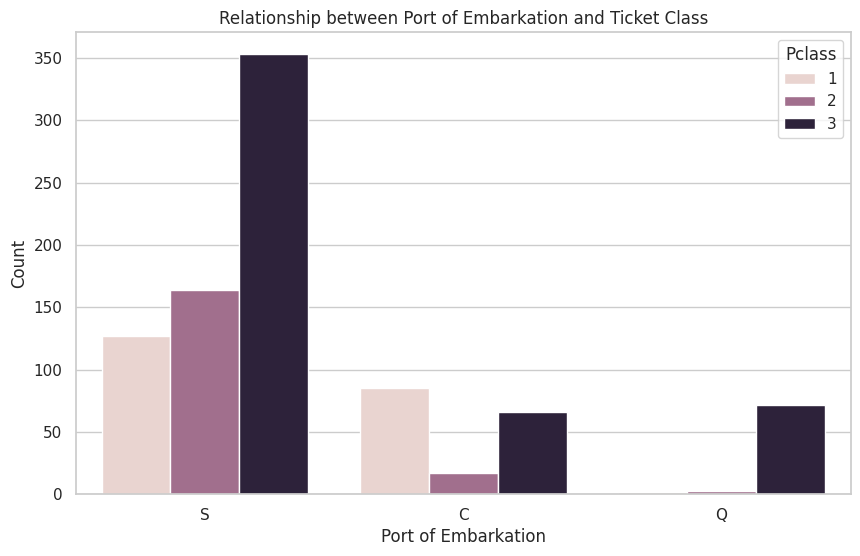

In [63]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Pclass"
)
plt.title("Relationship between Port of Embarkation and Ticket Class")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

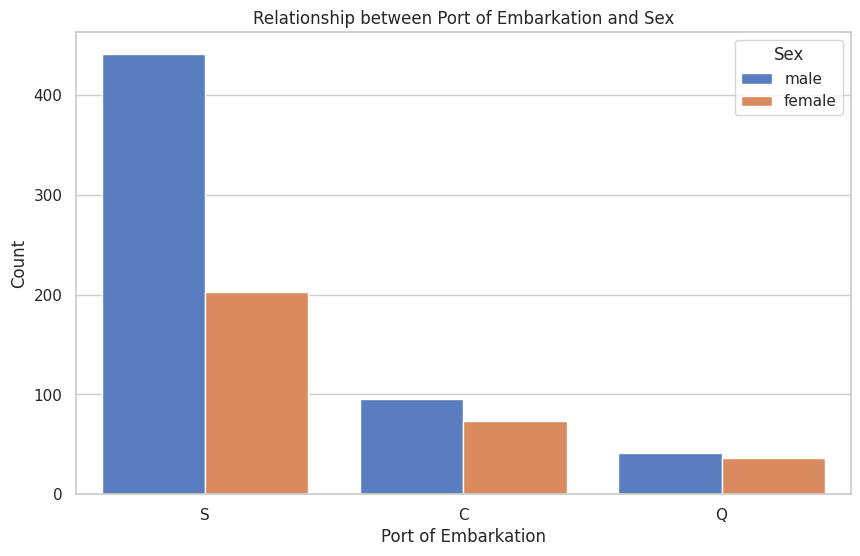

In [64]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Sex"
)
plt.title("Relationship between Port of Embarkation and Sex")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

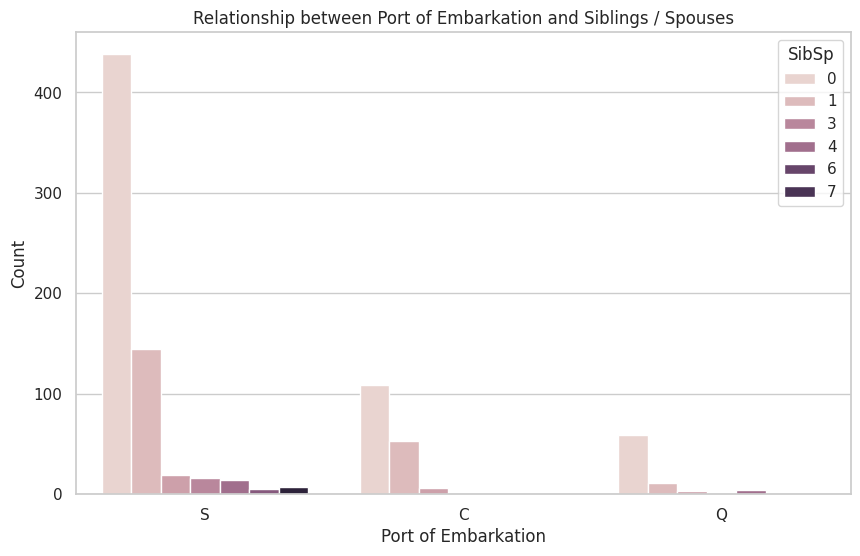

In [65]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="SibSp"
)
plt.title("Relationship between Port of Embarkation and Siblings / Spouses")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

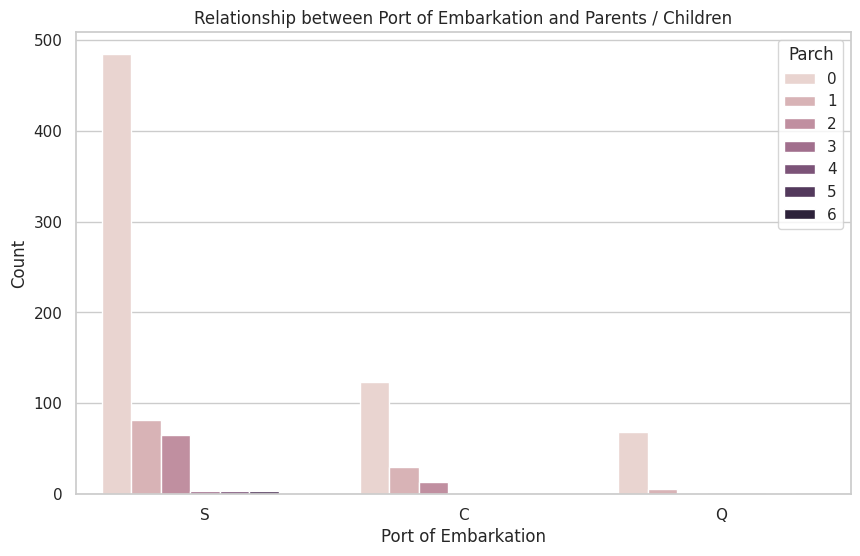

In [66]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Parch"
)
plt.title("Relationship between Port of Embarkation and Parents / Children")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

## 4. Data preparation

**Cleaning and filtering**:
* `Age` has been filled out with median value according to `Sex` and `Pclass`
* Rows with missing values in `Embarked` were deleted as they are only 2 missing values

**Feature transformations**:
* `Embarked`, `Pclass` was codded as dummy variable
* `Sex` was coded as 0 for female and 1 for male
* `Age` and `Fare` were scaled with `sklearn.preprocessing.StandardScaler`

**Feature selection**:
* Deleted `PassengerId`, `Name`, `Ticket`, `Cabin`, `Age`, `Parch`, `SibSp`
* Selected `Survived`, `Sex`, `Age`, `Fare`, `EmbarkedC`, `EmbarkedB`, `EmbarkedA`, `Pclass1`, `Pclass2`, `Pclass3`

### 4.1 Delete textual columns

In [67]:
train_clean = train[
    # Delete PassengerId, Name, Ticket, Cabin, Age
    ["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]
]

In [68]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp',
       'Parch'],
      dtype='object')

### 4.2 Fill out empty observations

In [69]:
train_clean["Age"].isna().sum()

np.int64(177)

In [70]:
GROUP_MEDIAN = train_clean.groupby(["Sex", "Pclass"])["Age"].median()
GROUP_MEDIAN

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [71]:
def fill_age(row):
    if pd.isnull(row["Age"]):
        return GROUP_MEDIAN.loc[row["Sex"], row["Pclass"]]
    else:
        return row["Age"]

In [72]:
train_clean["Age"] = train_clean.apply(fill_age, axis=1)

/tmp/ipykernel_8980/4283509575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean["Age"] = train_clean.apply(fill_age, axis=1)


In [73]:
train_clean["Age"].isna().sum()

np.int64(0)

### 4.3 Delete missing observations

In [74]:
train_clean["Embarked"].isna().sum()

np.int64(2)

In [75]:
train_clean = train_clean[~train_clean["Embarked"].isna()]

In [76]:
train_clean["Embarked"].isna().sum()

np.int64(0)

### 4.4 Create dummy variables

#### 4.4.1 Create dummy variable from Port of Embarkation

In [77]:
embarked = pd.get_dummies(
    data=train_clean["Embarked"],
    prefix="Embarked",
    prefix_sep="",
    drop_first=False
).astype(int)

In [78]:
embarked

,EmbarkedC,EmbarkedQ,EmbarkedS
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [79]:
train_clean[["EmbarkedC", "EmbarkedQ", "EmbarkedS"]] = embarked

In [80]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp',
       'Parch', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS'],
      dtype='object')

In [81]:
train_clean = train_clean.drop(labels=["Embarked"], axis=1)

In [82]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch',
       'EmbarkedC', 'EmbarkedQ', 'EmbarkedS'],
      dtype='object')

#### 4.4.2 Create dummy variable from Sex

In [83]:
train_clean["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [84]:
train_clean["Sex"] = train_clean["Sex"].map(
    lambda x: 1 if x == "male" else 0
)

In [85]:
train_clean["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

#### 4.4.3 Create dummy variable from Ticket Class

In [86]:
pclass = pd.get_dummies(
    data=train_clean["Pclass"],
    prefix="Pclass",
    prefix_sep="",
    drop_first=False
).astype(int)

In [87]:
pclass

,Pclass1,Pclass2,Pclass3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [88]:
train_clean[["Pclass1", "Pclass2", "Pclass3"]] = pclass

In [89]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch',
       'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Pclass2', 'Pclass3'],
      dtype='object')

In [90]:
train_clean = train_clean.drop(labels=["Pclass"], axis=1)

In [91]:
train_clean.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'EmbarkedC',
       'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Pclass2', 'Pclass3'],
      dtype='object')

### 4.5 Scale numerical columns

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

#### 4.5.1 Scale Age

In [94]:
train_clean["Age"].mean(), train_clean["Age"].std()

(np.float64(29.06543307086614), np.float64(13.27016179195023))

In [95]:
train_clean["Age"] = scaler.fit_transform(train_clean[["Age"]])

In [96]:
train_clean["Age"].mean(), train_clean["Age"].std()

(np.float64(2.6375602114829364e-16), np.float64(1.0005629046322506))

#### 4.5.2 Scale Fare

In [97]:
train_clean["Fare"].mean(), train_clean["Fare"].std()

(np.float64(32.09668087739032), np.float64(49.697504316707956))

In [98]:
train_clean["Fare"] = scaler.fit_transform(train_clean[["Fare"]])

In [99]:
train_clean["Fare"].mean(), train_clean["Fare"].std()

(np.float64(1.3987061727561027e-16), np.float64(1.0005629046322506))

### 4.6 Delete numerical columns

In [100]:
train_clean = train_clean.drop(["Parch", "SibSp"], axis=1)

### 4.7 Save data

In [101]:
train_clean.head()

,Survived,Sex,Age,Fare,EmbarkedC,EmbarkedQ,EmbarkedS,Pclass1,Pclass2,Pclass3
0,0,1,-0.532730,-0.500240,0,0,1,0,0,1
1,1,0,0.673661,0.788947,1,0,0,1,0,0
2,1,0,-0.231132,-0.486650,0,0,1,0,0,1
3,1,0,0.447463,0.422861,0,0,1,1,0,0
4,0,1,0.447463,-0.484133,0,0,1,0,0,1


In [102]:
train_clean.to_csv("data/train_clean.csv", index=False)